In [4]:
# the path of PWR is in ../
import sys
sys.path.append('../')
import torch
import torch.nn as nn
import torch.nn.init as init
from PWR.models.core.resnet2 import resnet8

model = resnet8()
for name, module in model.named_modules():
    if isinstance(module, nn.Conv2d):
        init.kaiming_normal_(module.weight, mode='fan_out', nonlinearity='relu')
        if module.bias is not None:
            init.constant_(module.bias, 0)
        print(name, module.weight.data.var())

    elif isinstance(module, nn.BatchNorm2d):
        init.constant_(module.weight, 1)
        init.constant_(module.bias, 0)
    elif isinstance(module, nn.Linear):
        init.kaiming_normal_(module.weight, mode='fan_out', nonlinearity='relu')
        print(name, module.weight.data.var())



conv1 tensor(0.0139)
layer1.0.conv1 tensor(0.0140)
layer1.0.conv2 tensor(0.0136)
layer2.0.conv1 tensor(0.0070)
layer2.0.conv2 tensor(0.0068)
layer3.0.conv1 tensor(0.0035)
layer3.0.conv2 tensor(0.0035)
fc tensor(0.1997)


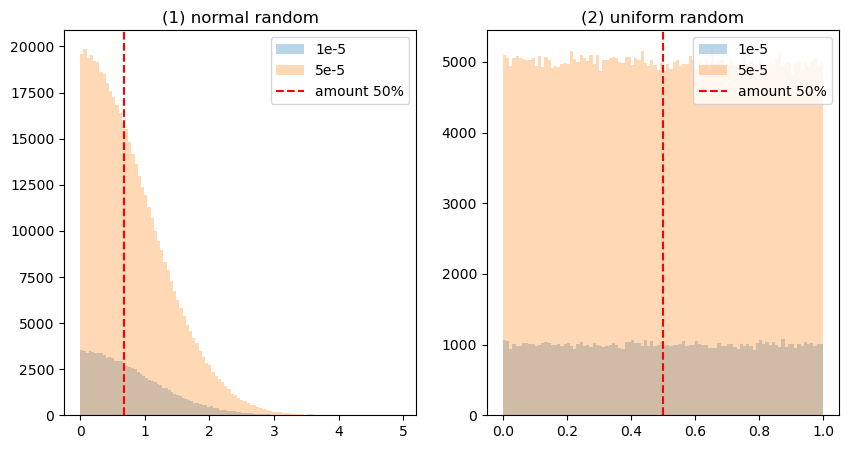

In [17]:
import matplotlib.pyplot as plt
import numpy as np

count = [1e5, 5e5]

randn_1 = np.abs(np.random.randn(int(count[0])))
randn_2 = np.abs(np.random.randn(int(count[1])))
n_randn_50 = np.sum(randn_1 < 1) / len(randn_1)
radnu_1 = np.random.rand(int(count[0]))
radnu_2 = np.random.rand(int(count[1]))
n_rand_50 = np.sum(radnu_1 < 0.5) / len(radnu_1)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.hist(randn_1, bins=100, alpha=0.3, label='1e-5')
plt.hist(randn_2, bins=100, alpha=0.3, label='5e-5')
plt.axvline(x=n_randn_50, color='r', linestyle='--', label='amount 50%')
plt.title('(1) normal random')
plt.legend(loc='upper right')

plt.subplot(122)
plt.hist(radnu_1, bins=100, alpha=0.3, label='1e-5')
plt.hist(radnu_2, bins=100, alpha=0.3, label='5e-5')
plt.axvline(x=n_rand_50, color='r', linestyle='--', label='amount 50%')
plt.title('(2) uniform random')
plt.legend(loc='upper right')
# plt.show()

plt.savefig('plot.png', dpi=600, bbox_inches='tight')
